In [30]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("./used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [32]:
df.isna().any()

,0
brand,False
model,False
model_year,False
milage,False
fuel_type,True
engine,False
transmission,False
ext_col,False
int_col,False
accident,True


In [33]:
featues = ["milage", "model_year"]
y = "price"

In [34]:
df["milage_value"] = df["milage"].str.replace("mi.", "").str.replace(",", "").astype(int)
df["price_value"] = df["price"].str.replace("$", "").str.replace(",", "").astype(int)

In [35]:
X = torch.column_stack(
    [torch.tensor(df["milage_value"], dtype=torch.float32), torch.tensor(df["model_year"], dtype=torch.float32)]
)

y = torch.tensor(df["price_value"], dtype=torch.float32).reshape((-1, 1))

# Not Normalized

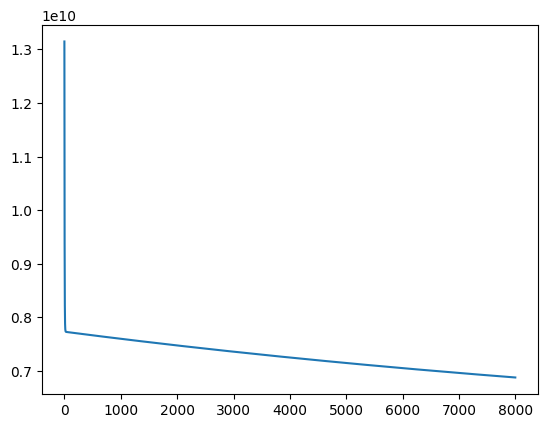

In [40]:
alpha = 0.00000000001

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)
loss_function = torch.nn.MSELoss()

losses = []

for i in range(1, 8000):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_function(y_pred, y)
  loss.backward()
  optimizer.step()

  losses.append(loss.item())


plt.plot(losses)


### Conclustion

Without normalizing the model takes a longer time to converge and needs more processing power.

# Normalized

In [37]:
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)

y_mean = y.mean()
y_std = y.std()

x_mean, y_mean

(tensor([64717.5547,  2015.5156]), tensor(44553.1875))

In [38]:
X_new = (X - x_mean) / x_std
y_new = (y - y_mean) / y_std

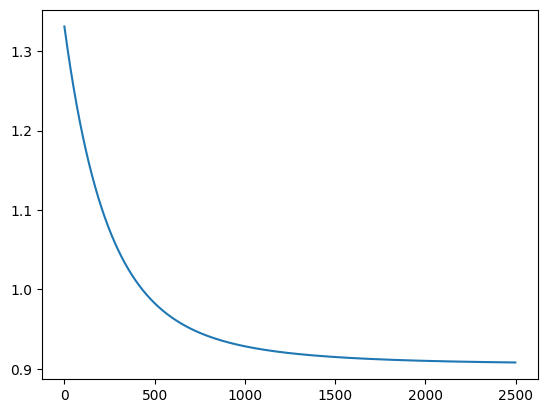

In [39]:
alpha = 0.001

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)
loss_function = torch.nn.MSELoss()

losses = []

for i in range(1, 2500):
  optimizer.zero_grad()
  y_pred = model(X_new)
  loss = loss_function(y_pred, y_new)
  loss.backward()
  optimizer.step()

  losses.append(loss.item())

plt.plot(losses)
